# IPL WIN PREDICTOR
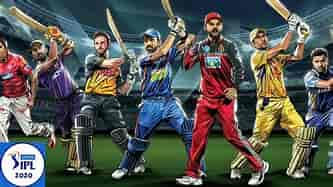


In this project we will be looking to design a machine Learning model that can give live probablities of a team winning a ipl game from the second innings onwards. Let us see how could we build it!


#### IMPORTING ALL REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### IMPORT REQUIRED DATASET

In [2]:
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')

In [6]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Data collected from kaggle is of 2008-2020 https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020

In [32]:
matches_1=pd.read_csv('IPL Matches 2008-2020.csv')

In [33]:
matches_1.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [34]:
del_1=pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [35]:
del_1.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [12]:
matches_1.shape

(816, 17)

In [13]:
del_1.shape

(193468, 18)

In [15]:
#Observations: The size of the del_1 is really huge because the data is taken ball by ball from 2008-2019

In [6]:
matches_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [18]:
del_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [20]:
matches_1.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [21]:
del_1.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [23]:
#Now the data given in del_1 contains match-id and innings track of each ball and total runs
#let us combine the total runs and look the total final score of each innings
# lets say match id = 1,so inning 1 score = 207,inning 2 score = 172 ,in this way

In [36]:
totalrun_df = del_1.groupby(['id','inning']).sum()['total_runs'].reset_index()

totalrun_df

,id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1625,1237178,2,132
1626,1237180,1,189
1627,1237180,2,172
1628,1237181,1,156


In [32]:
#As we are predicting win probablities based on 1st innings score so we will only talke 1st innings into account

In [37]:
totalrun1_df = totalrun_df[totalrun_df['inning']==1]


In [38]:
totalrun1_df.head(10)

,id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
10,335987,1,166
12,335988,1,142
14,335989,1,208
16,335990,1,214
18,335991,1,182


In [30]:
totalrun1_df.shape

(816, 3)

In [ ]:
#Let us merge this with matches_1 dataset

In [39]:
match_df = matches_1.merge(totalrun_df[['id','total_runs']],left_on='id',right_on='id')

match_df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,total_runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,222
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,82
2,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,240
3,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,207
4,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,132
1626,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,189
1627,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,172
1628,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon,156


In [40]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [41]:
match_df['team1'].value_counts()

Royal Challengers Bangalore    215
Mumbai Indians                 194
Kolkata Knight Riders          190
Chennai Super Kings            188
Kings XI Punjab                184
Delhi Daredevils               165
Rajasthan Royals               140
Sunrisers Hyderabad            118
Deccan Chargers                 78
Pune Warriors                   46
Delhi Capitals                  38
Gujarat Lions                   32
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Rising Pune Supergiant          14
Name: team1, dtype: int64

### IT IS IMPORTANT TO REPLACE OUR DATA WITH DATA THAT MATCHES CURRENT PLAYING TEAMS AND CURRENT TREND OF TEAMS IN IPL TO MAKE SURE WE GET A PRESENT DAY PREDITION CORRECT

In [42]:
#TEAMS THAT PLAY IPL CURRENTLY
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [43]:
# replacing the Delhi Daredevils with Delhi Capitals

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')


# replacing the Deccan Chargers with Sunrises Hyderabad

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')



In [44]:
match_df.shape

(1630, 18)

In [45]:
#LET US CONSIDER ONLY THOSE TEAMS WHO HAVE PLAYED THE MATCHES REGULARLY FROM 2008-2020
#AND THOSE TEAMS WHO ARE CURRENTLY PLAYING IN IPL AS PER 2020 DATA

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]



In [15]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings'], dtype=object)

In [16]:
match_df['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Kings XI Punjab', 'Delhi Capitals', 'Mumbai Indians'],
      dtype=object)

In [22]:
match_df.shape

(1401, 18)

In [17]:
match_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,total_runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,222
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,82
2,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,240
3,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,207
4,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,129


In [46]:
#LET US DROP SOME INSIGNIFICANT COLOUMS OR FEATURES.
match_df.isnull().sum()

id                    0
city                 26
date                  0
player_of_match       5
venue                 0
neutral_venue         0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                5
result_margin        29
eliminator            5
method             1371
umpire1               0
umpire2               0
total_runs            0
dtype: int64

In [47]:
match_df[~match_df['method'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,total_runs
80,336022,Delhi,2008-05-17,DPMD Jayawardene,Feroz Shah Kotla,0,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,N,D/L,AV Jayaprakash,RE Koertzen,118
81,336022,Delhi,2008-05-17,DPMD Jayawardene,Feroz Shah Kotla,0,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,N,D/L,AV Jayaprakash,RE Koertzen,94
86,336025,Kolkata,2008-05-18,M Ntini,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,N,D/L,Asad Rauf,K Hariharan,149
87,336025,Kolkata,2008-05-18,M Ntini,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,N,D/L,Asad Rauf,K Hariharan,55
120,392183,Cape Town,2009-04-19,DL Vettori,Newlands,1,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,N,D/L,MR Benson,SD Ranade,104
121,392183,Cape Town,2009-04-19,DL Vettori,Newlands,1,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,N,D/L,MR Benson,SD Ranade,58
126,392186,Durban,2009-04-21,CH Gayle,Kingsmead,1,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,N,D/L,DJ Harper,SD Ranade,158
127,392186,Durban,2009-04-21,CH Gayle,Kingsmead,1,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,N,D/L,DJ Harper,SD Ranade,79
178,392214,Centurion,2009-05-07,ML Hayden,SuperSport Park,1,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,N,D/L,DJ Harper,TH Wijewardene,185
179,392214,Centurion,2009-05-07,ML Hayden,SuperSport Park,1,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,N,D/L,DJ Harper,TH Wijewardene,174


In [48]:
match_df=match_df[match_df['method'].isnull()]

In [49]:
match_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,total_runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,222
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,82
2,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,240
3,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,207
4,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,129


In [50]:
match_df.drop('method',axis=1,inplace=True)

In [51]:
match_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,total_runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,222
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,82
2,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,240
3,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,207
4,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar,129


In [52]:
match_df.eliminator.unique()

array(['N', 'Y', nan], dtype=object)

In [53]:
match_df.drop('eliminator',axis=1,inplace=True)

In [54]:
match_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2,total_runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,Asad Rauf,RE Koertzen,222
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,Asad Rauf,RE Koertzen,82
2,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,MR Benson,SL Shastri,240
3,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,MR Benson,SL Shastri,207
4,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,Aleem Dar,GA Pratapkumar,129


In [55]:
match_df.shape

(1371, 16)

In [56]:
match_df=match_df[['id','city','winner','total_runs']]

In [57]:
match_df.head(10)

,id,city,winner,total_runs
0,335982,Bangalore,Kolkata Knight Riders,222
1,335982,Bangalore,Kolkata Knight Riders,82
2,335983,Chandigarh,Chennai Super Kings,240
3,335983,Chandigarh,Chennai Super Kings,207
4,335984,Delhi,Delhi Daredevils,129
5,335984,Delhi,Delhi Daredevils,132
6,335985,Mumbai,Royal Challengers Bangalore,165
7,335985,Mumbai,Royal Challengers Bangalore,166
8,335986,Kolkata,Kolkata Knight Riders,110
9,335986,Kolkata,Kolkata Knight Riders,112


In [30]:
del_1.head(10)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
6,335982,1,7,5,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
7,335982,1,7,6,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
8,335982,1,8,1,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
9,335982,1,8,2,BB McCullum,RT Ponting,JH Kallis,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [31]:
del_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [58]:
delivery_df = match_df.merge(del_1,on='id')

In [59]:
delivery_df.head(5)

,id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,extra_runs,total_runs_y,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,Kolkata Knight Riders,222,1,6,5,RT Ponting,BB McCullum,AA Noffke,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,Kolkata Knight Riders,222,1,6,6,BB McCullum,RT Ponting,AA Noffke,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,Kolkata Knight Riders,222,1,7,1,BB McCullum,RT Ponting,Z Khan,...,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,Kolkata Knight Riders,222,1,7,2,BB McCullum,RT Ponting,Z Khan,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,Kolkata Knight Riders,222,1,7,3,RT Ponting,BB McCullum,Z Khan,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [60]:
delivery_df.columns

Index(['id', 'city', 'winner', 'total_runs_x', 'inning', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'batsman_runs', 'extra_runs',
       'total_runs_y', 'non_boundary', 'is_wicket', 'dismissal_kind',
       'player_dismissed', 'fielder', 'extras_type', 'batting_team',
       'bowling_team'],
      dtype='object')

In [61]:
delivery_df = delivery_df[delivery_df['inning'] == 2]
delivery_df.head()

,id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,extra_runs,total_runs_y,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,1,1,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders
124,335982,Bangalore,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,1,1,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders
125,335982,Bangalore,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [62]:
delivery_df.shape

(158900, 21)

In [64]:
'''
So by observation we can observe that in the matchdf we had taken
firstinnings total runs,right and in the second case,that is in the 
delivery dataframe we considered second inning runs,as our main aim
is to find the probability of either teams to win or loose,we need 
current runs and runrate,so for current runs,we can apply groupby
on matchid and take the cummulative sum wrt total_runs_y,now,basically
totalruns was present in matchdf as well as deliveries_df,but as we merged
both the dataframes,it resulted in total_runs_x,and total_runs_y,
so total_runs_x is the first innings runs and total_runs_y are the second
innings runs,ball by ball,by applying cummulative sum,this becomes 
current score


total_runs_y gives the run scored after each ball,so in the second innings,
we want to get the total second innings runs,so we will groupby match id
and will apply the cummulative sum


'''

# current score of particular match

delivery_df['current_score'] = delivery_df.groupby('id').cumsum()['total_runs_y']

delivery_df.head()

,id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,total_runs_y,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current_score
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,1,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2
124,335982,Bangalore,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,1,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3
125,335982,Bangalore,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3


In [65]:
# runs left 

delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']

delivery_df.head()

,id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current_score,runs_left
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,222
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,221
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,220
124,335982,Bangalore,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,0,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3,219
125,335982,Bangalore,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3,219


In [66]:
'''
if one ball is played,then balls left = 120-1 = 119........(1)
if two balls are played,then balls left = 120-2 = 118

so similarly if over=1,over has 6 balls right,so 1*6 = 6
now,ball = 1,so 6+1 = 7,now 126-7 = 119,which is same as (1)

so we'll use balls_left = 126-(over*6+current_ball)

'''

# balls left


delivery_df['balls_left'] = 126-(delivery_df['over']*6+delivery_df['ball'])

delivery_df

,id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current_score,runs_left,balls_left
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,222,88
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,221,87
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,220,86
124,335982,Bangalore,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3,219,85
125,335982,Bangalore,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3,219,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327738,1237181,Dubai,Mumbai Indians,157,2,17,6,HH Pandya,Ishan Kishan,K Rabada,...,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,311,-154,18
327739,1237181,Dubai,Mumbai Indians,157,2,18,1,HH Pandya,Ishan Kishan,A Nortje,...,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,312,-155,17
327740,1237181,Dubai,Mumbai Indians,157,2,18,2,Ishan Kishan,HH Pandya,A Nortje,...,0,NaN,NaN,NaN,NaN,Mumbai Indians,Delhi Capitals,313,-156,16
327741,1237181,Dubai,Mumbai Indians,157,2,18,3,HH Pandya,Ishan Kishan,A Nortje,...,1,caught,HH Pandya,AM Rahane,NaN,Mumbai Indians,Delhi Capitals,313,-156,15


In [68]:
delivery_df.head(10)

,id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current_score,runs_left,balls_left
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,222,88
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,221,87
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,220,86
124,335982,Bangalore,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,0,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3,219,85
125,335982,Bangalore,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3,219,84
126,335982,Bangalore,Kolkata Knight Riders,222,2,6,7,MV Boucher,CL White,AB Agarkar,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3,219,83
127,335982,Bangalore,Kolkata Knight Riders,222,2,6,8,MV Boucher,CL White,AB Agarkar,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,7,215,82
128,335982,Bangalore,Kolkata Knight Riders,222,2,7,1,CL White,MV Boucher,SC Ganguly,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,8,214,83
129,335982,Bangalore,Kolkata Knight Riders,222,2,7,2,MV Boucher,CL White,SC Ganguly,...,0,NaN,NaN,NaN,legbyes,Royal Challengers Bangalore,Kolkata Knight Riders,9,213,82
130,335982,Bangalore,Kolkata Knight Riders,222,2,7,3,CL White,MV Boucher,SC Ganguly,...,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,10,212,81


In [71]:
delivery_df['wickets_left']=10-delivery_df['is_wicket']

In [72]:
delivery_df.head(10)

,id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,current_score,runs_left,balls_left,wickets_left
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,222,88,10
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,221,87,10
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,220,86,10
124,335982,Bangalore,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,NaN,NaN,NaN,wides,Royal Challengers Bangalore,Kolkata Knight Riders,3,219,85,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3,219,84,10
126,335982,Bangalore,Kolkata Knight Riders,222,2,6,7,MV Boucher,CL White,AB Agarkar,...,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,3,219,83,10
127,335982,Bangalore,Kolkata Knight Riders,222,2,6,8,MV Boucher,CL White,AB Agarkar,...,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,7,215,82,10
128,335982,Bangalore,Kolkata Knight Riders,222,2,7,1,CL White,MV Boucher,SC Ganguly,...,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,8,214,83,10
129,335982,Bangalore,Kolkata Knight Riders,222,2,7,2,MV Boucher,CL White,SC Ganguly,...,NaN,NaN,NaN,legbyes,Royal Challengers Bangalore,Kolkata Knight Riders,9,213,82,10
130,335982,Bangalore,Kolkata Knight Riders,222,2,7,3,CL White,MV Boucher,SC Ganguly,...,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,10,212,81,10


In [73]:
delivery_df.columns

Index(['id', 'city', 'winner', 'total_runs_x', 'inning', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'batsman_runs', 'extra_runs',
       'total_runs_y', 'non_boundary', 'is_wicket', 'dismissal_kind',
       'player_dismissed', 'fielder', 'extras_type', 'batting_team',
       'bowling_team', 'current_score', 'runs_left', 'balls_left',
       'wickets_left'],
      dtype='object')

In [77]:
delivery_df.drop('wickets_left',axis=1,inplace=True)

In [78]:
delivery_df.columns

Index(['id', 'city', 'winner', 'total_runs_x', 'inning', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'batsman_runs', 'extra_runs',
       'total_runs_y', 'non_boundary', 'is_wicket', 'dismissal_kind',
       'player_dismissed', 'fielder', 'extras_type', 'batting_team',
       'bowling_team', 'current_score', 'runs_left', 'balls_left'],
      dtype='object')

In [79]:
delivery_df['total_wickets'] = delivery_df.groupby('id').cumsum()['is_wicket']

In [83]:
delivery_df[['is_wicket','total_wickets']].head(20)

,is_wicket,total_wickets
121,0,0
122,0,0
123,0,0
124,0,0
125,0,0
126,0,0
127,0,0
128,0,0
129,0,0
130,0,0


In [85]:
delivery_df['wickets_left']=10-delivery_df['total_wickets']

In [86]:
# current run rate

delivery_df['cur_run_rate'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

# required run rate

delivery_df['req_run_rate'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])


delivery_df.head(3)

,id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,extras_type,batting_team,bowling_team,current_score,runs_left,balls_left,total_wickets,wickets_left,cur_run_rate,req_run_rate
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,222,88,0,10,0.000000,15.136364
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,221,87,0,10,0.181818,15.241379
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,wides,Royal Challengers Bangalore,Kolkata Knight Riders,2,220,86,0,10,0.352941,15.348837


In [87]:
def resultfun(row):
    
    return 1 if row['batting_team'] == row['winner'] else 0

In [88]:
delivery_df['result'] = delivery_df.apply(resultfun,axis=1)
delivery_df.head()

,id,city,winner,total_runs_x,inning,over,ball,batsman,non_striker,bowler,...,batting_team,bowling_team,current_score,runs_left,balls_left,total_wickets,wickets_left,cur_run_rate,req_run_rate,result
121,335982,Bangalore,Kolkata Knight Riders,222,2,6,2,CL White,MV Boucher,AB Agarkar,...,Royal Challengers Bangalore,Kolkata Knight Riders,0,222,88,0,10,0.000000,15.136364,0
122,335982,Bangalore,Kolkata Knight Riders,222,2,6,3,CL White,MV Boucher,AB Agarkar,...,Royal Challengers Bangalore,Kolkata Knight Riders,1,221,87,0,10,0.181818,15.241379,0
123,335982,Bangalore,Kolkata Knight Riders,222,2,6,4,MV Boucher,CL White,AB Agarkar,...,Royal Challengers Bangalore,Kolkata Knight Riders,2,220,86,0,10,0.352941,15.348837,0
124,335982,Bangalore,Kolkata Knight Riders,222,2,6,5,MV Boucher,CL White,AB Agarkar,...,Royal Challengers Bangalore,Kolkata Knight Riders,3,219,85,0,10,0.514286,15.458824,0
125,335982,Bangalore,Kolkata Knight Riders,222,2,6,6,MV Boucher,CL White,AB Agarkar,...,Royal Challengers Bangalore,Kolkata Knight Riders,3,219,84,0,10,0.500000,15.642857,0


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='result', ylabel='count'>

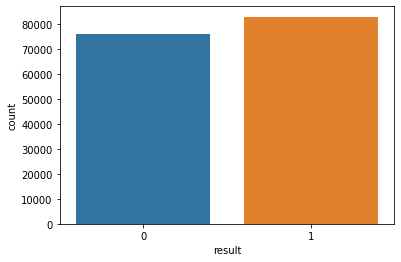

In [89]:
sns.countplot(delivery_df['result'])

In [91]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left',
                        'balls_left','wickets_left','total_runs_x','cur_run_rate',
                        'req_run_rate','result']]

final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate,result
121,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,222,88,10,222,0.000000,15.136364,0
122,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,87,10,222,0.181818,15.241379,0
123,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,86,10,222,0.352941,15.348837,0
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,85,10,222,0.514286,15.458824,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,84,10,222,0.500000,15.642857,0
